# Topic - Indian Election

### Conducting an analysis of the results from the Indian Elections in 2009 and 2014.

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Reading and Understanding Data

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import *

In [3]:
# Reading 2009 candidate dataset
df_2009 = pd.read_excel('indian-election-2009.xlsx')
#df_2009.head()

In [4]:
# Reading 2014 candidate dataset
df_2014 = pd.read_excel('indian-election-2014.xlsx')
#df_2014.head()

In [5]:
#Merging 2009 & 2014 Candidate datasets
df = pd.concat([df_2009, df_2014])
df.head()

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0
1,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,KOTNAK RAMESH,M,ST,39.0,INC,257181.0,2.0
2,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,MESRAM NAGO RAO,M,ST,59.0,PRAP,112930.0,3.0
3,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,ADE TUKARAM,M,ST,55.0,BJP,57931.0,4.0
4,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD SADASHIV NAIK,M,ST,50.0,BSP,16471.0,5.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16864 entries, 0 to 8793
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ST_CODE             16864 non-null  object 
 1   State name          16864 non-null  object 
 2   Month               16864 non-null  int64  
 3   Year                16864 non-null  int64  
 4   PC Number           16864 non-null  int64  
 5   PC name             16864 non-null  object 
 6   PC Type             16864 non-null  object 
 7   Candidate Name      16864 non-null  object 
 8   Candidate Sex       16279 non-null  object 
 9   Candidate Category  16279 non-null  object 
 10  Candidate Age       16279 non-null  float64
 11  Party Abbreviation  16821 non-null  object 
 12  Total Votes Polled  16821 non-null  float64
 13  Position            16821 non-null  float64
dtypes: float64(3), int64(3), object(8)
memory usage: 1.9+ MB


In [7]:
#Checking all political parties abbreviation so that we can make it conscise by including alliance & significant parties

print('Total number of unique political parties = ', df['Party Abbreviation'].nunique())
print('\nAll political parties = \n\n', df['Party Abbreviation'].unique())

Total number of unique political parties =  650

All political parties = 

 ['TDP' 'INC' 'PRAP' 'BJP' 'BSP' 'IND' 'TRS' 'MCPI(S)' 'PPOI' 'RPI(A)'
 'LSP' 'TPPP' 'IJP' 'BSP(AP)' 'BPD' 'SP' 'RKSP' 'MUL' 'ANC' 'UWF' 'SAP'
 'AJBP' 'AIMIM' 'JD(S)' 'MANP' 'GRIP' 'SJP(R)' 'CPI' 'CPM' 'RJD' 'BSSP'
 'BHSASP' 'JD(U)' 'RPI' 'RDHP' 'RDMP' 'CPI(ML)(L)' 'PBHP' 'RPI(KH)'
 'RPC(S)' 'BCUF' 'BJSH' 'RRS' nan 'LB' 'AC' 'PPA' 'AUDF' 'ASDC' 'NCP'
 'RWS' 'BOPF' 'AGP' 'RVNP' 'LJP' 'RCPI(R)' 'RSPS' 'AIMF' 'JMM' 'BVM'
 'AIFB' 'SHS' 'LTSD' 'BJKVP' 'BLPGL' 'BJJD' 'RSP' 'RPP' 'JGP' 'KSVP'
 'RKJP' 'RJJM' 'ABAS' 'ABJS' 'RSWD' 'AD' 'RMEP' 'PTSS' 'LPSP' 'SBSP'
 'SJTP' 'BMF' 'SLP(L)' 'KVSP' 'ABDBM' 'NBNP' 'BHJAP' 'BSP(K)' 'JVM' 'BSKP'
 'LM' 'JPS' 'EKSP' 'BUDM' 'BJKD' 'JKM' 'PMSP' 'SSD' 'AJSP' 'RLD' 'STPI'
 'MAG' 'UGDP' 'SGF' 'BNJD' 'MJP' 'LSWP' 'VHS' 'NLHP' 'KKJHS' 'NSCP'
 'RSP(S)' 'ABMSD' 'SVPP' 'RPIE' 'ADSP' 'HJCBL' 'INLD' 'JKNPP' 'RASJP'
 'SMBHP' 'BHBP' 'BRPP' 'NELU' 'VAJP' 'RASAP' 'JCP' 'BHC' 'NSSP' 'AIFB(S)'
 'RND'

#### Note: Creating an Alliance column for optimized substitution of Winning Party Abbreviation column

In [8]:
# Create a new column copyign the Party Abbreviation
df['Alliance'] = df['Party Abbreviation']

# Making the substitutions
df['Alliance']=df['Alliance'].replace(to_replace=['INC','NCP', 'RJD', 'DMK', 'IUML', 'JMM','JD(s)','KC(M)','RLD','RSP',
                                                  'CMP(J)','KC(J)','PPI','MD'],value='UPA')

df['Alliance']=df['Alliance'].replace(to_replace=['BJP','SS', 'LJP', 'SAD', 'RLSP', 'AD','PMK','NPP','AINRC','NPF',
                                                  'RPI(A)','BPF','JD(U)','SDF','NDPP','MNF','RIDALOS','KMDK','IJK',
                                                  'PNK','JSP','GJM','MGP','GFP','GVP','AJSU','IPFT','MPP','KPP','JKPC',
                                                  'KC(T)','BDJS','AGP','JSS','PPA','UDP','HSPDP','PSP','JRS','KVC','PNP',
                                                  'SBSP','KC(N)','PDF','MDPF'],value='NDA')

df['Alliance']=df['Alliance'].replace(to_replace=['YSRCP','AAAP', 'IND', 'AIUDF', 'BLSP', 'JKPDP', 'JD(S)', 'INLD', 
                                                  'CPI', 'AIMIM', 'KEC(M)','SWP', 'NPEP', 'JKN', 'AIFB', 'MUL', 'AUDF', 
                                                  'BOPF', 'BVA', 'HJCBL', 'JVM','MDMK'],value='Others')

#### Getting the seats Won by the each Alliance

In [9]:
df_seats = df[(df.Position==1)].groupby(['Alliance','Year'])['Position'].sum().reset_index()
df_seats = df_seats.pivot(index='Alliance',columns='Year',values='Position').reset_index().fillna(0).sort_values([2014],ascending=False).reset_index(drop = True)

alliance_list = list(df_seats['Alliance'])
year09_list = list(df_seats[2009])
year14_list = list(df_seats[2014])
dict = {'Alliance': alliance_list, 2009: year09_list, 2014: year14_list}
df_seat = pd.DataFrame(dict)

print('Seats Won by the each Alliance')
df_seat.style.hide_index()

Seats Won by the each Alliance


Alliance,2009,2014
NDA,143.000000,300.000000
UPA,245.000000,59.000000
ADMK,9.000000,37.000000
AITC,19.000000,34.000000
Others,32.000000,34.000000
BJD,14.000000,20.000000
SHS,11.000000,18.000000
TDP,6.000000,16.000000
TRS,2.000000,11.000000
CPM,16.000000,9.000000


## Exploratory data analysis

### 2009 VS 2014

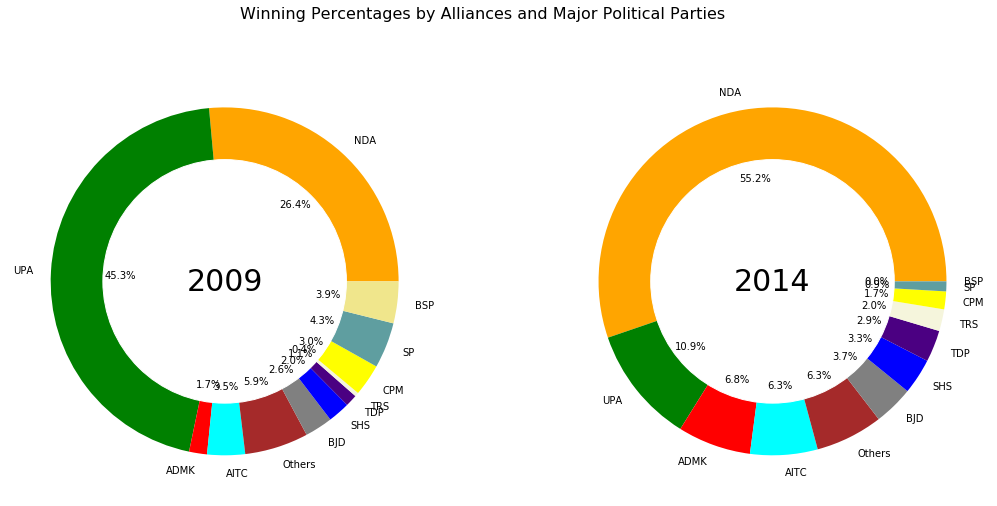

In [10]:
colors  = ("orange", "green", "red", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow","cadetblue","khaki")

plt.figure(figsize=(18,8))
plt.subplot(1,2,1)

plt.pie(df_seats[2009], labels = df_seats['Alliance'], colors=colors, autopct='%1.1f%%')
my_circle1=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf()
fig.suptitle("Winning Percentages by Alliances and Major Political Parties", fontsize=16)
ax = fig.gca()
ax.add_patch(my_circle1)

label = ax.annotate("2009", xy=(0, 0), fontsize=30, ha="center",va="center")
ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.subplot(1,2,2)
plt.pie(df_seats[2014], labels = df_seats['Alliance'], colors=colors,autopct='%1.1f%%')
my_circle2=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf()
ax = fig.gca()
ax.add_patch(my_circle2)

label = ax.annotate("2014", xy=(0, 0), fontsize=30, ha="center",va="center")
ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.show();
#plt.tight_layout()

### Comparing Age Distriuction of the Winners

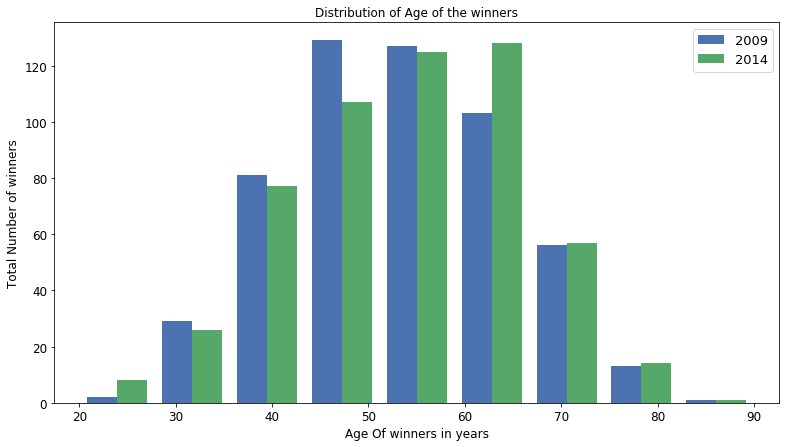

In [11]:
bins = np.linspace(20, 90, 10)
plt.figure(figsize=(13,7))
plt.style.use('seaborn-deep')

age_09 = df[(df.Position==1) & (df.Year==2009)]['Candidate Age'].tolist()
age_14 = df[(df.Position==1) & (df.Year==2014)]['Candidate Age'].tolist()


plt.hist([age_09, age_14], bins, label=['2009', '2014'])

plt.legend(loc='upper right', fontsize=13)
plt.xlabel('Age Of winners in years', fontsize=12)
plt.ylabel('Total Number of winners', fontsize=12)
plt.title('Distribution of Age of the winners', fontsize=12)
plt.tick_params(labelsize=12)
plt.show()

### Age Distribution of Winning Candidates in 2009 & 2014 for NDA & UPA

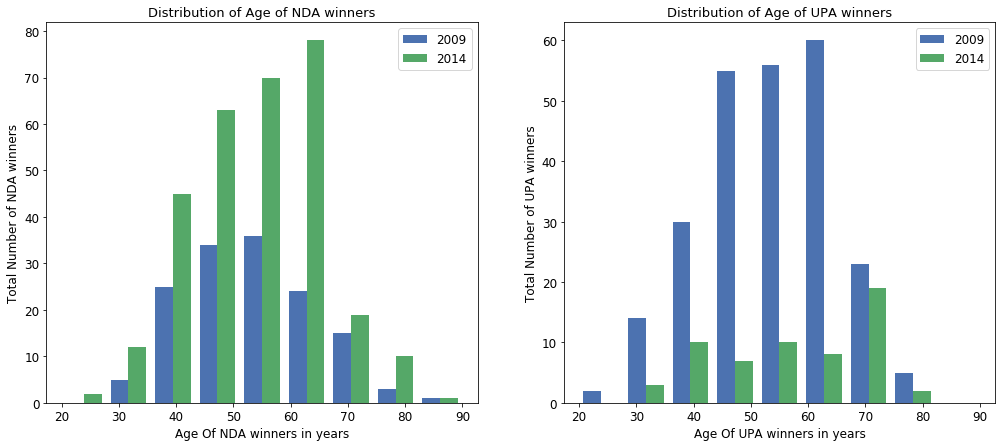

In [12]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.style.use('seaborn-deep')

upa_age_09 = df[(df.Position==1) & (df.Year==2009)& (df.Alliance=='UPA')]['Candidate Age'].tolist()
upa_age_14 = df[(df.Position==1) & (df.Year==2014)& (df.Alliance=='UPA')]['Candidate Age'].tolist()
nda_age_09 = df[(df.Position==1) & (df.Year==2009)& (df.Alliance=='NDA')]['Candidate Age'].tolist()
nda_age_14 = df[(df.Position==1) & (df.Year==2014)& (df.Alliance=='NDA')]['Candidate Age'].tolist()

bins = np.linspace(20, 90, 10)
plt.hist([nda_age_09, nda_age_14], bins, label=['2009', '2014'])
plt.title('Distribution of Age of NDA winners', fontsize=13)
plt.xlabel('Age Of NDA winners in years', fontsize=12)
plt.ylabel('Total Number of NDA winners', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(1,2,2)
bins = np.linspace(20, 90, 10)
plt.hist([upa_age_09, upa_age_14], bins, label=['2009', '2014'])
plt.title('Distribution of Age of UPA winners', fontsize=13)
plt.xlabel('Age Of UPA winners in years', fontsize=12)
plt.ylabel('Total Number of UPA winners', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.tick_params(labelsize=12)
          
plt.show();